<a href="https://colab.research.google.com/github/dinaamr01/seRep/blob/branch1/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Adham Ashraf

ID: 46-2185

Tutorial: T-01

---

Name: Dina Amr

ID: 46-3921

Tutorial: T-01

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [61]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,MA,3.9,50404,Black,Gray,The Hertz Corporation,11000,10900,2015-06-01 19:30:00+00:00
1,2014,Toyota,4Runner,SR5,SUV,Automatic,FL,4.9,17846,Gray,Black,Award Auto Sales And Leasing Inc,28700,29900,2015-02-17 23:15:00+00:00
2,2012,Lexus,IS 250,Base,Sedan,Automatic,FL,4.1,21122,Silver,Black,Lexus Financial Services,22200,24200,2015-01-19 17:30:00+00:00
3,2002,BMW,X5,4.4i,SUV,Automatic,FL,1.9,145303,Black,Black,Peddle Llc,3675,3200,2015-03-03 23:10:00+00:00
4,2014,Ford,E-Series Van,E-250,Mini-van,Automatic,WA,4.9,6714,White,Gray,U-Haul,22500,22100,2015-02-17 22:45:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,Automatic,VA,3.5,52844,Black,Gray,Wheels Exchange Llc,15650,17000,2015-01-07 01:30:00+00:00
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,Automatic,CA,4.5,23185,Black,Black,Nissan Infiniti Lt,19350,21500,2015-06-17 22:30:00+00:00
46575,2013,BMW,3 Series,328i,Sedan,Automatic,TX,4.2,45357,White,Beige,Motorcars Of South Texas,22200,22000,2015-02-17 18:00:00+00:00
46576,2013,Toyota,Camry,LE,Sedan,Automatic,CA,3.5,43376,Black,Beige,Avis Rac/San Leandro,13400,13800,2015-01-13 20:30:00+00:00


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [56]:
df['odometer'] = df['odometer'].str.extract('(\d+)').astype(int) 
df['odometer'] = df['odometer'].astype(int)
df['sellingprice'] = df['sellingprice'].str.extract('(\d+)').astype(int)
df['mmr'] = df['mmr'].str.extract('(\d+)').astype(int)
df['seller'] = df['seller'].str.title()
df['state'] = df['state'].str.upper()
df['color'] = df['color'].str.title()
df['interior'] = df['interior'].str.title()
df['transmission'] = df['transmission'].str.title()
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
df['color'] = df['color'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df['interior'] = df['interior'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df['transmission'] = df['transmission'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df['make'] = df['make'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df['state'] = df['state'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df['interior'].fillna(df['interior'].mode()[0], inplace=True)
df['color'].fillna(df['color'].mode()[0], inplace=True)
df = df.drop('vin', 1)
df['body']=df['body'].replace({'sedan': 'Sedan', 'G Sedan':'Sedan','g sedan':'Sedan'})
df['body']=df['body'].replace({'suv': 'SUV', 'Suv':'SUV'})
df['body']=df['body'].replace({'wagon': 'Wagon', 'CTS Wagon':'Wagon','TSX Sport Wagon': 'Wagon' , 'tsx sport wagon':'Wagon' })
df['body']=df['body'].replace({'coupe': 'Coupe', 'G Coupe':'Coupe','g coupe': 'Coupe' , 'Genesis Coupe':'Coupe', 'genesis coupe':'Coupe','Elantra Coupe':'Coupe', 'CTS Coupe':'Coupe', 'CTS Coupe': 'Coupe', 'CTS-V Coupe':'Coupe', 'Q60 Coupe':'Coupe', 'cts coupe':'Coupe','Koup':'Coupe'})
df['body']=df['body'].replace({'convertible': 'Convertible', 'G Convertible':'Convertible','Beetle Convertible': 'Convertible' , 'G37 Convertible':'Convertible', 'Q60 Convertible': 'Convertible', 'GranTurismo Convertible': 'Convertible', 'beetle convertible': 'Convertible', 'g convertible': 'Convertible', 'granturismo convertible': 'Convertible'})
df['body']=df['body'].replace({'hatchback': 'Hatchback' })
df['body']=df['body'].replace({'E-Series Van':'Mini-van', 'van':'Mini-van', 'Minivan': 'Mini-van', 'Van':'Mini-van', 'van':'Mini-van', 'minivan':'Mini-van', 'e-series van':'Mini-van','promaster cargo van':'Mini-van', 'Promaster Cargo Van':'Mini-van', 'Transit Van':'Mini-van'})
df['body']=df['body'].replace({'Crew Cab': 'Pickup Truck', 'Regular Cab':'Pickup Truck', 'Double Cab':'Pickup Truck', 'Extended Cab':'Pickup Truck', 'SuperCab':'Pickup Truck', 'king cab':'Pickup Truck', 'King Cab':'Pickup Truck', 'extended cab':'Pickup Truck', 'quad cab':'Pickup Truck', 'supercab':'Pickup Truck', 'Quad Cab':'Pickup Truck', 'crew cab':'Pickup Truck','CrewMax Cab':'Pickup Truck', 'double cab':'Pickup Truck', 'Club Cab':'Pickup Truck', 'Access Cab':'Pickup Truck','Cab Plus 4':'Pickup Truck', 'crewmax cab':'Pickup Truck', 'access cab':'Pickup Truck', 'Mega Cab':'Pickup Truck', 'regular cab':'Pickup Truck', 'mega cab':'Pickup Truck', 'regular-cab':'Pickup Truck', 'Xtracab':'Pickup Truck', 'xtracab':'Pickup Truck','Quad Cab':'Pickup Truck','SuperCrew':'Pickup Truck','supercrew':'Pickup Truck'})
df['body'] = pd.Categorical(df['body'], categories=['Sedan', 'Coupe', 'SUV', 'Hatchback', 'Wagon', 'Convertible', 'Mini-van','Pickup Truck'], ordered=False)




## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<AxesSubplot:xlabel='color', ylabel='count'>

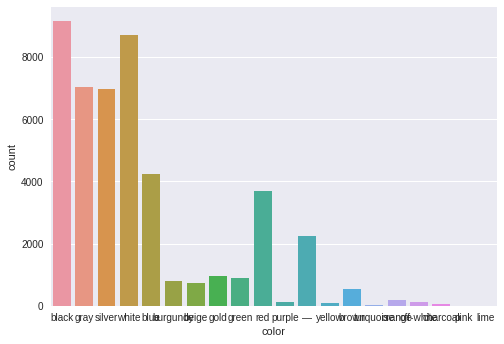

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

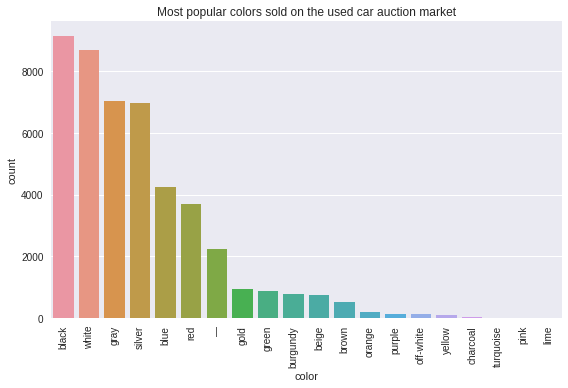

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

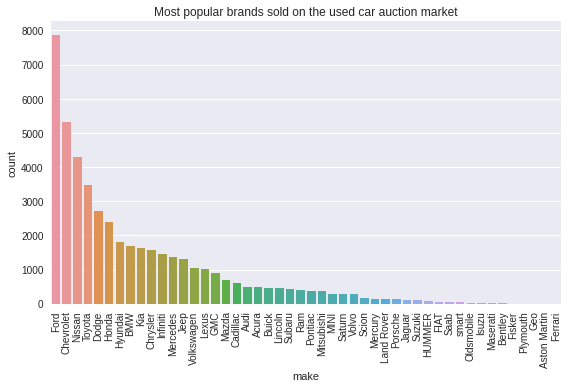

In [64]:
top_to_bot = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=top_to_bot.index).set(title='Most popular brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford, followed by Chevrolet and then Nissan


**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

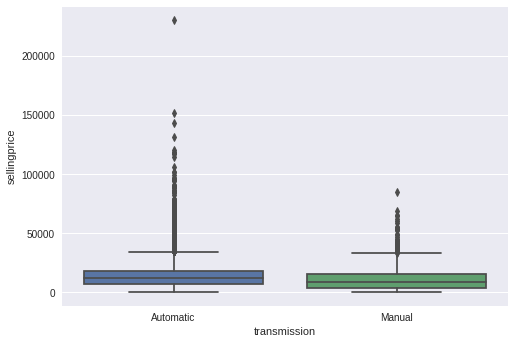

In [72]:
sns.boxplot(x='transmission', y='sellingprice', data=df);

**Answer for Q2**: The average price is a little bit higher for automatic cars, but the difference isn't big at all

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

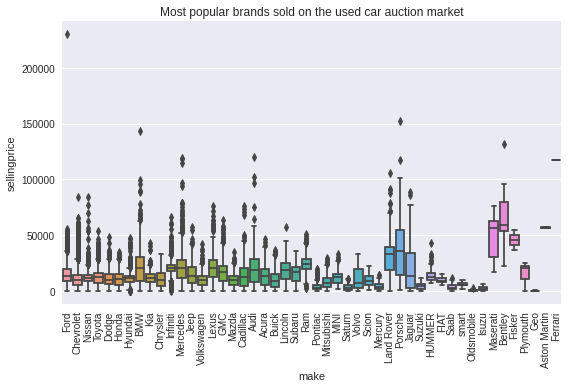

In [74]:
top_to_bot = df.groupby('make').size().sort_values(ascending=False)
sns.boxplot(x='make',y='sellingprice',data=df, order=top_to_bot.index).set(title='Most popular brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q3**: Widest range: Porsche and Maserrati. Most Expensive: Bentley and Masserati

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

Text(0.5, 1.0, 'Scatter Plot of Odometer and Age')

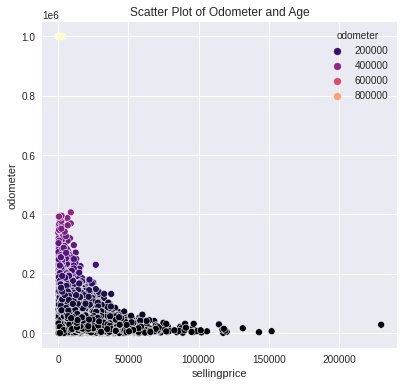

In [78]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='sellingprice', y='odometer', data=df, palette='magma', hue='odometer', ax=ax)
ax.set_title('Scatter Plot of Odometer and Selling Price')


**Answer for Q4**: Your answer here

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

**Answer for Q5**: Your answer here

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

**Answer for Q6**: Your answer here

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.